In [3]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.


In [15]:
from flask import Flask, render_template, request, redirect, url_for
from pymongo import MongoClient

app = Flask(__name__)

# Configure MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['DataCollectionForm']  # Replace 'userdata' with your database name
collection = db['DataCollectionForm']  # Collection to store user data

# Define routes and views
@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        # Retrieve form data
        age = int(request.form['age'])
        gender = request.form['gender']
        income = float(request.form['income'])
        utilities = float(request.form.get('utilities', 0))
        entertainment = float(request.form.get('entertainment', 0))
        school_fees = float(request.form.get('school_fees', 0))
        shopping = float(request.form.get('shopping', 0))
        healthcare = float(request.form.get('healthcare', 0))

        # Store data in MongoDB
        user_data = {
            'age': age,
            'gender': gender,
            'income': income,
            'expenses': {
                'utilities': utilities,
                'entertainment': entertainment,
                'school_fees': school_fees,
                'shopping': shopping,
                'healthcare': healthcare
            }
        }
        collection.insert_one(user_data)
        
        return redirect(url_for('success'))  # Redirect to success page after form submission
    return render_template('indexx.html')

@app.route('/success')
def success():
    return 'Data successfully submitted!'  # Placeholder success page

if __name__ == '__main__':
    app.run(debug=True)  # Run the application in debug mode


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [19]:
from flask import Flask, render_template, request, redirect, url_for
from pymongo import MongoClient

app = Flask(__name__)

# Configure MongoDB connection
client = MongoClient('mongodb://localhost:27017/')
db = client['DataCollectionForm']  # Replace 'userdata' with your database name
collection = db['DataCollectionForm']  # Collection to store user data

# Define routes and views
@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        # Retrieve form data
        age = int(request.form['age'])
        gender = request.form['gender']
        income = float(request.form['income'])

        # Initialize expenses dictionary
        expenses = {
            'utilities': 0,
            'entertainment': 0,
            'school_fees': 0,
            'shopping': 0,
            'healthcare': 0
        }

        # Update expenses dictionary based on form data
        if 'utilities' in request.form:
            expenses['utilities'] = float(request.form['utilities'])
        if 'entertainment' in request.form:
            expenses['entertainment'] = float(request.form['entertainment'])
        if 'school_fees' in request.form:
            expenses['school_fees'] = float(request.form['school_fees'])
        if 'shopping' in request.form:
            expenses['shopping'] = float(request.form['shopping'])
        if 'healthcare' in request.form:
            expenses['healthcare'] = float(request.form['healthcare'])

        # Store data in MongoDB
        user_data = {
            'age': age,
            'gender': gender,
            'income': income,
            'expenses': expenses
        }
        collection.insert_one(user_data)

        return redirect(url_for('success'))  # Redirect to success page after form submission
    return render_template('indexx.html')

@app.route('/success')
def success():
    return 'Data successfully submitted!'  # Placeholder success page

if __name__ == '__main__':
    app.run(debug=True)  # Run the application in debug mode


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [21]:
class User:
    def __init__(self, age, gender, income, utilities, entertainment, school_fees, shopping, healthcare):
        self.age = age
        self.gender = gender
        self.income = income
        self.utilities = utilities
        self.entertainment = entertainment
        self.school_fees = school_fees
        self.shopping = shopping
        self.healthcare = healthcare

    def to_dict(self):
        return {
            'Age': self.age,
            'Gender': self.gender,
            'Total Income': self.income,
            'Utilities': self.utilities,
            'Entertainment': self.entertainment,
            'School Fees': self.school_fees,
            'Shopping': self.shopping,
            'Healthcare': self.healthcare
        }

In [23]:
import csv

# Example list of User objects (replace with your actual data)
users = [
    User(30, 'Male', 50000, 100, 200, 50, 300, 150),
    User(25, 'Female', 60000, 120, 180, 70, 250, 200),
    # Add more User instances as needed
]

# Define CSV file path
csv_file = 'user_data.csv'

# Write data to CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['Age', 'Gender', 'Total Income', 'Utilities', 'Entertainment', 'School Fees', 'Shopping', 'Healthcare'])
    writer.writeheader()
    for user in users:
        writer.writerow(user.to_dict())

print(f'Data successfully written to {csv_file}')

Data successfully written to user_data.csv


In [25]:
import pandas as pd

# Load CSV file into a DataFrame
df = pd.read_csv('user_data.csv')

# Display the first few rows to verify
df.head()

,Age,Gender,Total Income,Utilities,Entertainment,School Fees,Shopping,Healthcare
0,30,Male,50000,100,200,50,300,150
1,25,Female,60000,120,180,70,250,200


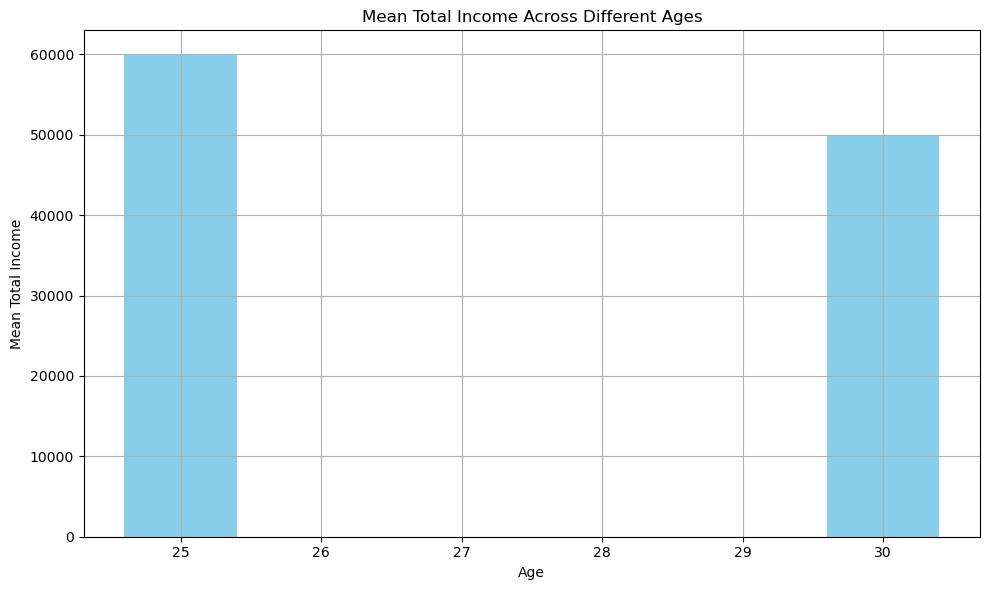

In [27]:
import matplotlib.pyplot as plt

# Group by Age and calculate mean income
age_income = df.groupby('Age')['Total Income'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(age_income['Age'], age_income['Total Income'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Mean Total Income')
plt.title('Mean Total Income Across Different Ages')
plt.grid(True)
plt.tight_layout()

# Save the plot as an image for PowerPoint
plt.savefig('age_income.png')

# Show plot
plt.show()

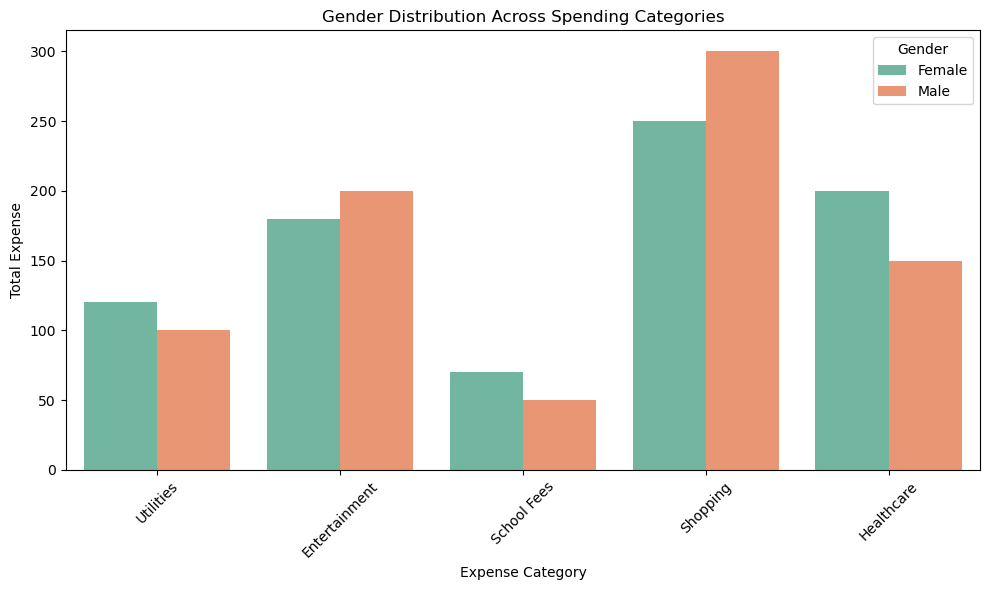

In [29]:
import seaborn as sns

# Group by Gender and sum the expenses
gender_spending = df.groupby('Gender')[['Utilities', 'Entertainment', 'School Fees', 'Shopping', 'Healthcare']].sum().reset_index()

# Melt the dataframe for easier plotting
gender_spending_melted = pd.melt(gender_spending, id_vars=['Gender'], var_name='Expense Category', value_name='Total Expense')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Expense Category', y='Total Expense', hue='Gender', data=gender_spending_melted, palette='Set2')
plt.xlabel('Expense Category')
plt.ylabel('Total Expense')
plt.title('Gender Distribution Across Spending Categories')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Save the plot as an image for PowerPoint
plt.savefig('gender_spending.png')

# Show plot
plt.show()